### Exploratory Data analysis of COVID-19 in India

In [1]:
import numpy as np
import folium
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()
% matplotlib inline
import re
import seaborn as sns
import plotly.express as px

In [2]:
location = pd.read_html("http://www.quickgs.com/latitudinal-and-longitudinal-extents-of-india-indian-states-and-cities/") 
coords=pd.DataFrame(location[0])
coords.head()

,State,Latitude,Longitude
0,Andhra Pradesh,15.91°N,79.74°E
1,Arunachal Pradesh,28.21°N,94.72°E
2,Assam,26.20°N,92.93°E
3,Bihar,25.09°N,85.31°E
4,Chhattisgarh,21.27°N,81.86°E


In [3]:
covidstats = pd.read_html('https://en.wikipedia.org/wiki/Template:COVID-19_pandemic_data/India_medical_cases_by_state_and_union_territory')
covid_data=pd.DataFrame(covidstats[0])
covid_data=covid_data.iloc[:36]
covid_data.dropna(axis=1,how='all',inplace=True)
covid_data


[show all].mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:"[ "}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:" ]"}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}.mw-parser-output .infobox .navbar{font-size:100%}.mw-parser-output .navbox .navbar{display:block;font-size:100%}.mw-parser-output .navbox-title .navbar{float:left;text-align:left;margin-right:0.5em}viewtalkeditCOVID-19 pandemic in India by state and union territory  \
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                State/Union Territory   
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              36 / 36   
0                         Andaman and Nicobar Islands                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [4]:
def data_pre(cord):
    return cord[0:5]
coords['Latitude']  = coords['Latitude'].apply(data_pre).astype('float')
coords['Longitude'] = coords['Longitude'].apply(data_pre).astype('float')
coords.head()
#coords


,State,Latitude,Longitude
0,Andhra Pradesh,15.91,79.74
1,Arunachal Pradesh,28.21,94.72
2,Assam,26.20,92.93
3,Bihar,25.09,85.31
4,Chhattisgarh,21.27,81.86


In [5]:
# Renaming Attribute Names for simplicity
covid_data.columns = ['State','Total cases','Deaths','Recoveries','Active cases']
covid_data=covid_data.reset_index(drop=True)
covid_data.columns
covid_DATA=pd.DataFrame(covid_data)
covid_DATA=covid_DATA.reset_index(drop=True)

In [6]:
covid_DATA['Total cases']=pd.to_numeric(covid_DATA['Total cases'],errors='ignore')
covid_DATA['Deaths']=pd.to_numeric(covid_DATA['Deaths'],errors='ignore')
covid_DATA['Total cases'][3]=covid_DATA['Total cases'][3][:7]
covid_DATA['Deaths'][16]=covid_DATA['Deaths'][16][:6]
covid_DATA['Deaths'][16]=covid_DATA['Deaths'][16].replace(',','')
covid_DATA['Total cases'][3]=covid_DATA['Total cases'][3].replace(',','')
covid_DATA

,State,Total cases,Deaths,Recoveries,Active cases
0,Andaman and Nicobar Islands,7280,126,7049,105
1,Andhra Pradesh,1820134,12052,1732948,75134
2,Arunachal Pradesh,31938,155,28934,2849
3,Assam,466590,4028,421378,41184
4,Bihar,717949,9514,704075,4360
5,Chandigarh,61200,797,59917,486
6,Chhattisgarh,988172,13342,963113,11717
7,Dadra and Nagar Haveli and Daman and Diu,10473,4,10408,61
8,Delhi,1431498,24851,1403569,3078
9,Goa,163048,2947,155926,4175


In [7]:
final_data = pd.merge(coords, covid_DATA, how ='inner', on ='State')
final_data

,State,Latitude,Longitude,Total cases,Deaths,Recoveries,Active cases
0,Andhra Pradesh,15.91,79.74,1820134,12052,1732948,75134
1,Arunachal Pradesh,28.21,94.72,31938,155,28934,2849
2,Assam,26.20,92.93,466590,4028,421378,41184
3,Bihar,25.09,85.31,717949,9514,704075,4360
4,Chhattisgarh,21.27,81.86,988172,13342,963113,11717
5,Goa,15.29,74.12,163048,2947,155926,4175
6,Gujarat,22.25,71.19,821078,10007,802187,8884
7,Haryana,29.05,76.08,766357,9070,753584,3703
8,Himachal Pradesh,31.10,77.17,199197,3410,191737,4050
9,Jharkhand,23.61,85.27,343793,5089,336058,2646


In [8]:
final_data['Total cases']=final_data['Total cases'].astype(str).astype(int)
final_data['Deaths']=final_data['Deaths'].astype(str).astype(int)
final_data['Recoveries']=final_data['Recoveries'].astype(str).astype(int)
final_data['Active cases']=final_data['Active cases'].astype(str).astype(int)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         27 non-null     object 
 1   Latitude      27 non-null     float64
 2   Longitude     27 non-null     float64
 3   Total cases   27 non-null     int32  
 4   Deaths        27 non-null     int32  
 5   Recoveries    27 non-null     int32  
 6   Active cases  27 non-null     int32  
dtypes: float64(2), int32(4), object(1)
memory usage: 1.3+ KB


Text(0.5,1,' Total cases vs State')

C:\Users\COMPUTER\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



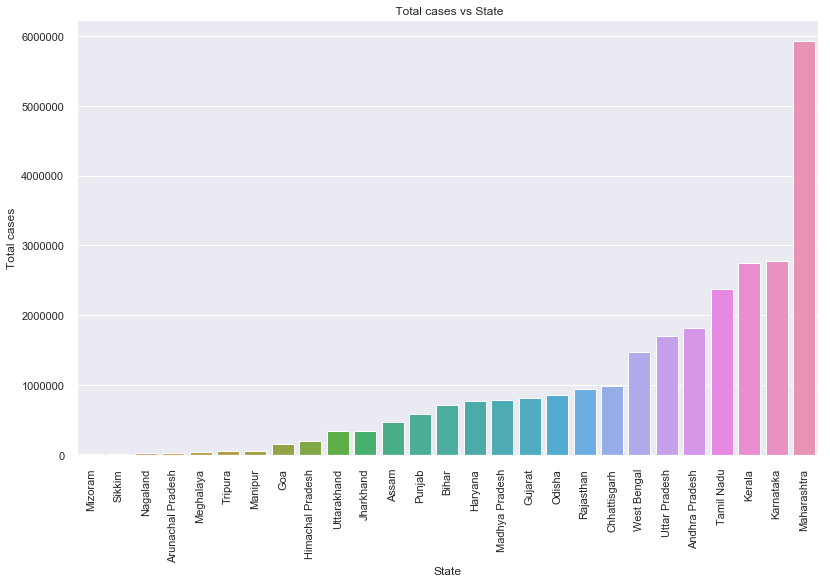

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=final_data.sort_values(by='Total cases'),x='State',y='Total cases')
plt.xticks(rotation='vertical')
plt.title(" Total cases vs State")

Text(0.5,1,' Number of deaths vs State')

C:\Users\COMPUTER\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



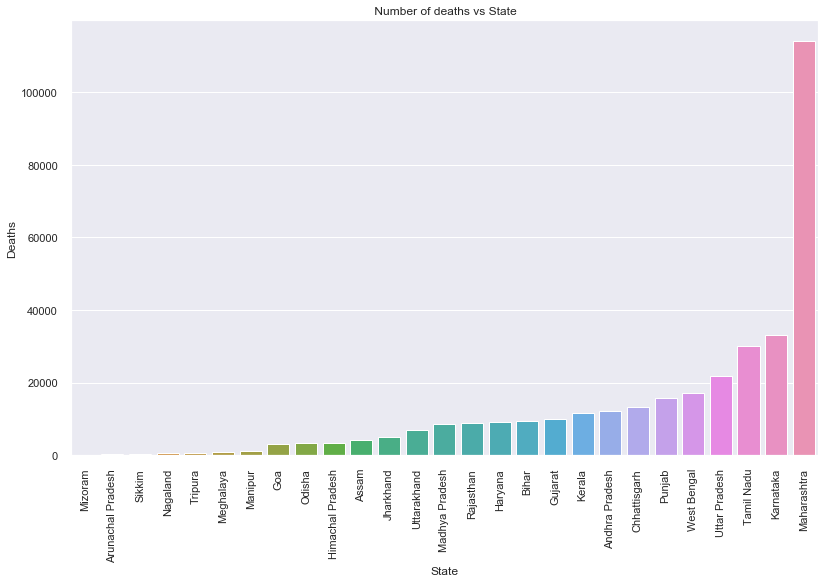

In [15]:
sns.barplot(x='State',y='Deaths',data=final_data.sort_values(by='Deaths'))
plt.xticks(rotation='vertical')
plt.title(" Number of deaths vs State")


Text(0.5,1,' Active cases vs States')

C:\Users\COMPUTER\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



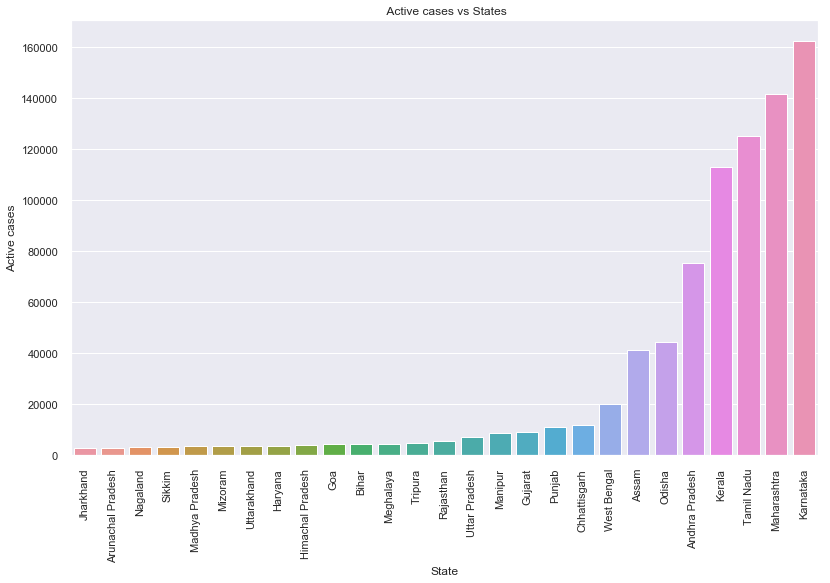

In [16]:
sns.barplot(x='State',y='Active cases',data=final_data.sort_values(by='Active cases'))
plt.xticks(rotation='vertical')
plt.title(" Active cases vs States")

Text(0.5,1,' Recoveries vs State')

C:\Users\COMPUTER\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



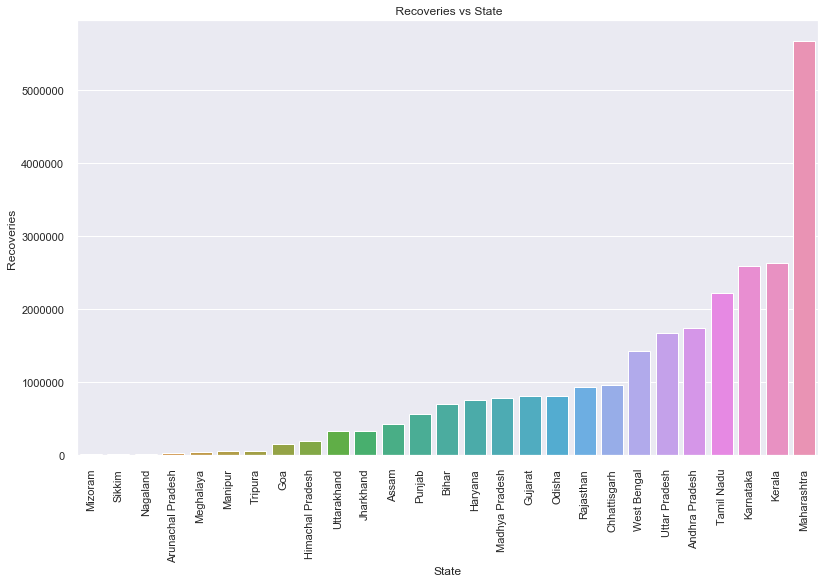

In [17]:
sns.barplot(x='State',y='Recoveries',data=final_data.sort_values(by='Recoveries'))
plt.xticks(rotation='vertical')
plt.title(" Recoveries vs State")

In [18]:
# retreiving the data from final table and plotting it on the INDIA map
India = folium.Map(location = [20.5937,78.9629],zoom_start=4.5)


for state,lat,long,total_cases,Death,Recov,Active in zip(list(final_data['State']),list(final_data['Latitude']),list(final_data['Longitude']),list(final_data['Total cases']),list(final_data['Deaths']),list(final_data['Recoveries']),list(final_data['Active cases'])):
    #for creating circle marker
    
    
    
    
    folium.CircleMarker(location = [lat,long],
                       radius = 5,
                       color='red',
                       fill = True,
                       fill_color="red").add_to(India)
    #for creating marker
    folium.Marker(location = [lat,long],
                  # adding information that need to be displayed on popup
                  popup=folium.Popup(('<strong><b>State  : '+state+'</strong> <br>' +
                    '<strong><b>Total Cases : '+str(total_cases)+'</striong><br>' +
                    '<strong><font color= red>Deaths : </font>'+str(Death)+'</striong><br>' +
                    '<strong><font color=green>Recoveries : </font>'+str(Recov)+'</striong><br>' +
                    '<strong><font color=brown>Active Cases :</font>'+str(Active)+'</striong>' ),max_width=200)).add_to(India)
#to show the map
India

#webbrowser.open(map, new=2)